# A tutorial to preprocessing with Huggingface
Reference:
[Colab](https://colab.research.google.com/github/huggingface/notebooks/blob/main/transformers_doc/en/pytorch/preprocessing.ipynb)

In [2]:
!pip install datasets

# Text processing

In [3]:
from transformers import AutoTokenizer

/opt/conda/envs/qllava/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased", device_maps="auto")

/opt/conda/envs/qllava/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:
sentence = "Do not meddle in the affairs of wizards, for they are subtle and quick to anger."

In [6]:
tokens = tokenizer.tokenize(sentence)
print(f"tokens = {tokens}")
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(f"token_ids = {token_ids}")

tokens = ['Do', 'not', 'me', '##ddle', 'in', 'the', 'affairs', 'of', 'wizard', '##s', ',', 'for', 'they', 'are', 'subtle', 'and', 'quick', 'to', 'anger', '.']
token_ids = [2091, 1136, 1143, 13002, 1107, 1103, 5707, 1104, 16678, 1116, 117, 1111, 1152, 1132, 11515, 1105, 3613, 1106, 4470, 119]


In [7]:
encoded_input = tokenizer(sentence)

In [8]:
from pprint import pprint

The tokenizer returns a dictionary with three important items:

- input_ids are the indices corresponding to each token in the sentence.
- attention_mask indicates whether a token should be attended to or not.
- token_type_ids identifies which sequence a token belongs to when there is more than one sequence.

In [9]:
print(encoded_input)

{'input_ids': [101, 2091, 1136, 1143, 13002, 1107, 1103, 5707, 1104, 16678, 1116, 117, 1111, 1152, 1132, 11515, 1105, 3613, 1106, 4470, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [10]:
# Test the decoding
tokenizer.decode(encoded_input["input_ids"])

'[CLS] Do not meddle in the affairs of wizards, for they are subtle and quick to anger. [SEP]'

# Batch inputs

In [11]:
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]

In [12]:
# Return the output as tensors
encoded_input = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="pt")
pprint(encoded_input)

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]),
 'input_ids': tensor([[  101,  1252,  1184,  1164,  1248,  6462,   136,   102,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  1790,   112,   189,  1341,  1119,  3520,  1164,  1248,  6462,
           117, 21902,  1643,   119,   102],
        [  101,  1327,  1164,  5450, 23434,   136,   102,     0,     0,     0,
             0,     0,     0,     0,     0]]),
 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}


In [13]:
print(encoded_input)

{'input_ids': tensor([[  101,  1252,  1184,  1164,  1248,  6462,   136,   102,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  1790,   112,   189,  1341,  1119,  3520,  1164,  1248,  6462,
           117, 21902,  1643,   119,   102],
        [  101,  1327,  1164,  5450, 23434,   136,   102,     0,     0,     0,
             0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


# Image processing

In [14]:
from datasets import load_dataset

In [15]:
dataset = load_dataset(path="food101", split="train[:100]")

In [16]:
type(dataset[0])

dict

In [17]:
from transformers import AutoImageProcessor

In [18]:
image_processor = AutoImageProcessor.from_pretrained(pretrained_model_name_or_path="google/vit-base-patch16-224")

/opt/conda/envs/qllava/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [19]:
print(image_processor)

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



In [20]:
# Add some more augmentations
from torchvision.transforms import RandomResizedCrop, ColorJitter, Compose
from typing import Dict, List
from PIL.Image import Image

In [21]:
target_size = (image_processor.size['height'], image_processor.size['width'])

In [22]:
combined_transformer = Compose(
    transforms=[RandomResizedCrop(target_size), ColorJitter(brightness=0.5, hue=0.5)]
)

In [23]:
def transform_images(image_dict: Dict[str, List]) -> Dict[str, List]:
    """Generates a field name 'pixel_values' that stores the processed image data"""
    images: List[Image] = [combined_transformer(im.convert("RGB")) for im in image_dict['image']]
    image_dict['pixel_values'] = image_processor(images, do_resize=False, return_tensors="pt")['pixel_values']
    return image_dict

In [24]:
dataset.set_transform(transform_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


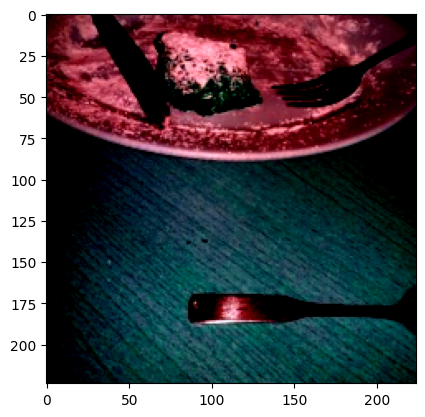

In [40]:
import matplotlib.pyplot as plt 
plt.imshow(dataset[0]['pixel_values'].permute(1,2,0), vmin=-0.5, vmax=0.5)
plt.show()